In [2]:
import numpy as np
import pandas as pd
from collections import Counter

# Sample dataset (replace with your actual dataset)
data = {'feature1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'feature2': [2, 4, 1, 3, 5, 7, 6, 8, 10, 9],
        'class': ['A', 'A', 'B', 'B', 'A', 'B', 'A', 'B', 'B', 'A']}
df = pd.DataFrame(data)

def euclidean_distance(x1, x2):
  return np.sqrt(np.sum((x1-x2)**2))

def knn(X_train, y_train, test_point, k=3):
  distances = [euclidean_distance(test_point, x) for x in X_train]
  k_indices = np.argsort(distances)[:k]
  k_nearest_labels = [y_train[i] for i in k_indices]
  most_common = Counter(k_nearest_labels).most_common(1)
  return most_common[0][0]


# Prepare the data
X = df[['feature1', 'feature2']].values
y = df['class'].values

# Example usage:
test_point = np.array([6, 6]) # Example test point
predicted_class = knn(X, y, test_point, k=3)
print(f"Predicted class for {test_point}: {predicted_class}")

# Example usage with multiple test points:
test_points = [[6,6], [2,3], [9,10]]
for point in test_points:
    predicted_class = knn(X, y, np.array(point),k=3)
    print(f"Predicted class for {point}: {predicted_class}")


Predicted class for [6 6]: A
Predicted class for [6, 6]: A
Predicted class for [2, 3]: A
Predicted class for [9, 10]: B


Predicted class for [6, 6]: 1.0
Predicted class for [2, 3]: -1.0
Predicted class for [9, 10]: 1.0
Predicted class for [6, 6]: 1.0
Predicted class for [2, 3]: -1.0
Predicted class for [9, 10]: 1.0


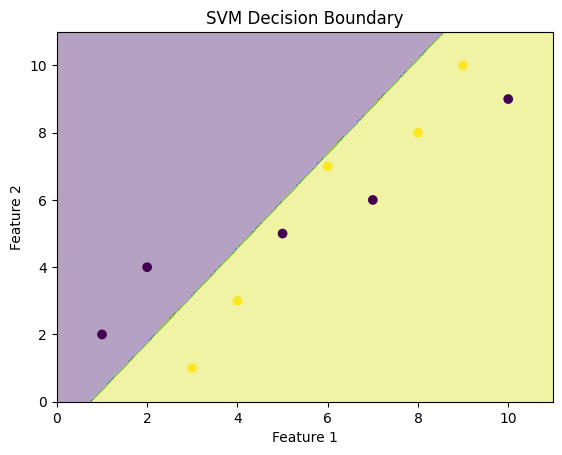

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Sample dataset (replace with your actual dataset)
data = {'feature1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'feature2': [2, 4, 1, 3, 5, 7, 6, 8, 10, 9],
        'class': [-1, -1, 1, 1, -1, 1, -1, 1, 1, -1]}  # Using -1 and 1 for class labels
df = pd.DataFrame(data)

# Prepare the data
X = df[['feature1', 'feature2']].values
y = df['class'].values

class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        y_ = np.where(y <= 0, -1, 1)

        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

# Initialize and train the SVM
clf = SVM()
clf.fit(X, y)

# Make predictions
test_points = [[6, 6], [2, 3], [9, 10]]
for point in test_points:
    prediction = clf.predict(np.array(point))
    print(f"Predicted class for {point}: {prediction}")

X = df[['feature1', 'feature2']].values
y = df['class'].values

# Plotting the decision boundary
def plot_decision_boundary(clf, X, y):
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01),
                         np.arange(x2_min, x2_max, 0.01))
    Z = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('SVM Decision Boundary')

# Initialize and train the SVM
clf = SVM()
clf.fit(X, y)

# Make predictions and print results
test_points = [[6, 6], [2, 3], [9, 10]]
for point in test_points:
    prediction = clf.predict(np.array(point))
    print(f"Predicted class for {point}: {prediction}")

# Plot the decision boundary
plot_decision_boundary(clf, X, y)
plt.show()
